### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import glob
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

### Data Load

In [94]:
df_list = []
directoryPath = "../../Data/ResultData/"

for file_name in glob.glob(directoryPath+'temperature/*.csv'):
    if file_name!= "../../Data/ResultData/temperature/0_Global_actual_temperatures.csv":
        print(f"{file_name}: {df.shape}")
        df = pd.read_csv(file_name, low_memory=False)
        df_list.append(df)

df_global_temp = pd.read_csv(directoryPath+'temperature/0_Global_actual_temperatures.csv', low_memory=False)
df_global_temp = df_global_temp.groupby(['Year','Month']).agg({"Actual Temperature":"first"}).reset_index()


../../Data/ResultData/temperature/6_Tokyo_actual_temperatures.csv: (3334, 7)
../../Data/ResultData/temperature/1_Peking_actual_temperatures.csv: (2418, 7)
../../Data/ResultData/temperature/11_Marrakesh_actual_temperatures.csv: (2418, 7)
../../Data/ResultData/temperature/18_Helsinki_actual_temperatures.csv: (2892, 7)
../../Data/ResultData/temperature/14_NewYork_actual_temperatures.csv: (3334, 7)
../../Data/ResultData/temperature/7_London_actual_temperatures.csv: (3333, 7)
../../Data/ResultData/temperature/4_Moscow_actual_temperatures.csv: (3334, 7)
../../Data/ResultData/temperature/9_Lhasa_actual_temperatures.csv: (3334, 7)
../../Data/ResultData/temperature/16_Rome_actual_temperatures.csv: (2458, 7)
../../Data/ResultData/temperature/13_SanDiego_actual_temperatures.csv: (3334, 7)
../../Data/ResultData/temperature/12_Anchorage_actual_temperatures.csv: (2096, 7)
../../Data/ResultData/temperature/10_Pretoria_actual_temperatures.csv: (2316, 7)
../../Data/ResultData/temperature/3_Riyadh_actua

In [97]:
df_temperature = pd.concat(df_list, ignore_index=True, axis=0)

In [98]:
df_temperature = df_temperature.merge(df_global_temp[['Year','Month','Actual Temperature']], 
                     how='left', 
                     on=['Year','Month'],
                     suffixes=('', '_Global'))

In [99]:
df_co2 = pd.read_csv(directoryPath+'co2.csv')
df_population = pd.read_csv(directoryPath+'population_modified.csv')
df_volcano = pd.read_csv(directoryPath+'volcano_yearly_VEI_stats.csv')

In [100]:
df_temperature[(df_temperature['City']=='7_London') & (df_temperature['Year']==1851)]

,Year,Month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Global
15689,1851,1,4.837,7_London,Britain,52.24 N,0.00 W,12.421
15690,1851,2,3.894,7_London,Britain,52.24 N,0.00 W,12.415
15691,1851,3,5.569,7_London,Britain,52.24 N,0.00 W,12.905
15692,1851,4,7.289,7_London,Britain,52.24 N,0.00 W,13.710
15693,1851,5,10.347,7_London,Britain,52.24 N,0.00 W,14.880
15694,1851,6,14.804,7_London,Britain,52.24 N,0.00 W,15.609
15695,1851,7,15.350,7_London,Britain,52.24 N,0.00 W,15.974
15696,1851,8,16.373,7_London,Britain,52.24 N,0.00 W,15.762
15697,1851,9,12.876,7_London,Britain,52.24 N,0.00 W,15.088
15698,1851,10,10.473,7_London,Britain,52.24 N,0.00 W,14.409


### Data Preparation

In [101]:
df_temperature.rename(columns={'Year': 'year'}, inplace=True)
df_temperature.rename(columns={'Month': 'month'}, inplace=True)
df_co2.rename(columns={'monthly_average': 'monthly_average_co2'}, inplace=True)

In [102]:
df_volcano = df_volcano[df_volcano.year>=1750]
df_volcano = df_volcano.groupby(['year']).agg({'year_average_VEI':'first', 
                                                'year_events_amount':'first'}).reset_index()

In [103]:
df_merged_intermediate = pd.merge(df_temperature, df_co2, on=['year','month'], how='left')

In [105]:
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['year'],
                                            how='left'), [df_merged_intermediate, df_population, df_volcano])

In [106]:
df_merged.head()

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
0,1819,7,22.664,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN
1,1819,8,NaN,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN
2,1819,9,20.356,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN
3,1819,10,13.372,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN
4,1819,11,6.752,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN


In [107]:
df_merged[(df_merged['City']=='7_London') & (df_merged['year']==1851)]

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
15689,1851,1,4.837,7_London,Britain,52.24 N,0.00 W,12.421,NaN,NaN,NaN,NaN
15690,1851,2,3.894,7_London,Britain,52.24 N,0.00 W,12.415,NaN,NaN,NaN,NaN
15691,1851,3,5.569,7_London,Britain,52.24 N,0.00 W,12.905,NaN,NaN,NaN,NaN
15692,1851,4,7.289,7_London,Britain,52.24 N,0.00 W,13.710,NaN,NaN,NaN,NaN
15693,1851,5,10.347,7_London,Britain,52.24 N,0.00 W,14.880,NaN,NaN,NaN,NaN
15694,1851,6,14.804,7_London,Britain,52.24 N,0.00 W,15.609,NaN,NaN,NaN,NaN
15695,1851,7,15.350,7_London,Britain,52.24 N,0.00 W,15.974,NaN,NaN,NaN,NaN
15696,1851,8,16.373,7_London,Britain,52.24 N,0.00 W,15.762,NaN,NaN,NaN,NaN
15697,1851,9,12.876,7_London,Britain,52.24 N,0.00 W,15.088,NaN,NaN,NaN,NaN
15698,1851,10,10.473,7_London,Britain,52.24 N,0.00 W,14.409,NaN,NaN,NaN,NaN


In [116]:
df_merged.groupby(['City']).agg({'Latitude':'first', 'Longitude':'first'}).reset_index()

,City,Latitude,Longitude
0,10_Pretoria,24.92 S,28.37 E
1,11_Marrakesh,31.35 N,7.54 W
2,12_Anchorage,61.88 N,151.13 W
3,13_SanDiego,32.95 N,117.77 W
4,14_NewYork,40.99 N,74.56 W
5,15_Paris,49.03 N,2.45 E
6,16_Rome,42.59 N,13.09 E
7,17_Barcelona,40.99 N,2.13 E
8,18_Helsinki,60.27 N,25.95 E
9,19_Sydney,34.56 S,151.78 E


### Plots

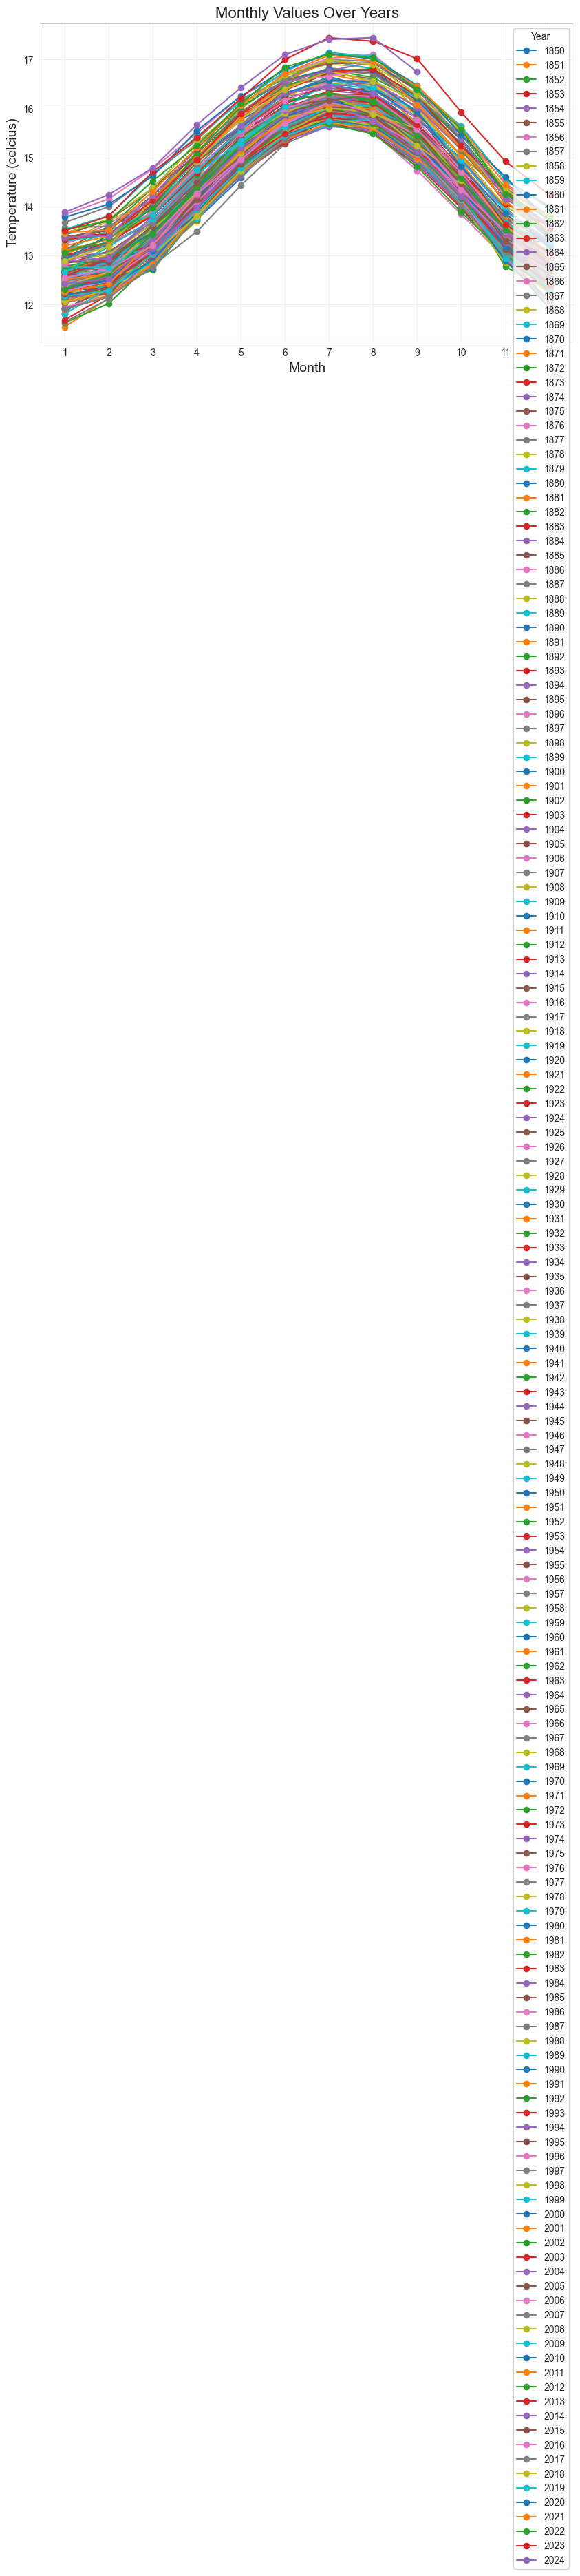

In [112]:
# Pivot table to structure data for plotting
pivot_df = df_global_temp.pivot(index='Month', columns='Year', values='Actual Temperature')

# Plotting
plt.figure(figsize=(10, 6))

for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year))

# Customizing the plot
plt.title('Monthly Values Over Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (celcius)', fontsize=14)
plt.xticks(pivot_df.index)  # Ensure x-axis shows months
plt.legend(title='Year')
plt.grid(alpha=0.3)

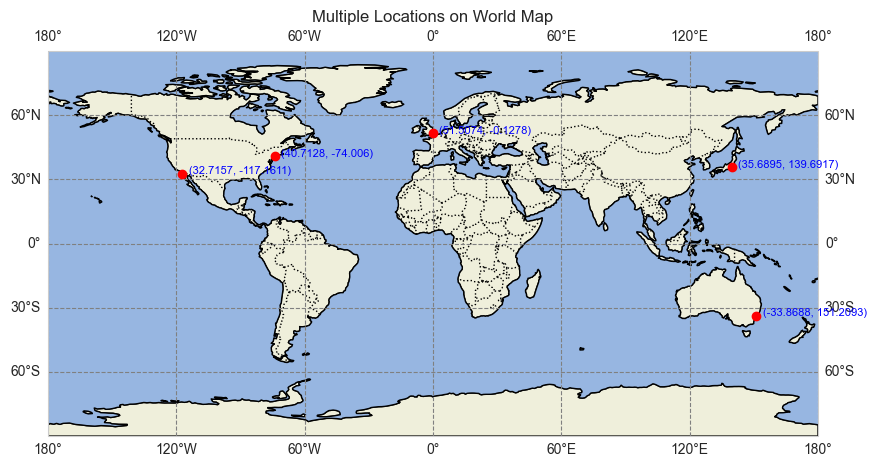

In [115]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of locations (latitude, longitude)
locations = [
    (32.7157, -117.1611),  # San Diego, CA
    (40.7128, -74.0060),   # New York, NY
    (51.5074, -0.1278),    # London, UK
    (35.6895, 139.6917),   # Tokyo, Japan
    (-33.8688, 151.2093)   # Sydney, Australia
]

# Create a figure and add a map projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add features like coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Add gridlines for better visualization
ax.gridlines(draw_labels=True, linestyle="--", color="gray")

# Plot each location on the map
for lat, lon in locations:
    ax.plot(lon, lat, 'ro', markersize=6)  # Red dots for each location

# Optional: Label each location
for lat, lon in locations:
    ax.text(lon + 3, lat, f"({lat}, {lon})", fontsize=8, color='blue')  # Adjust text offset as needed

# Set the extent (optional, focus on a specific region or use global)
ax.set_global()

# Show the map
plt.title("Multiple Locations on World Map")
plt.show()

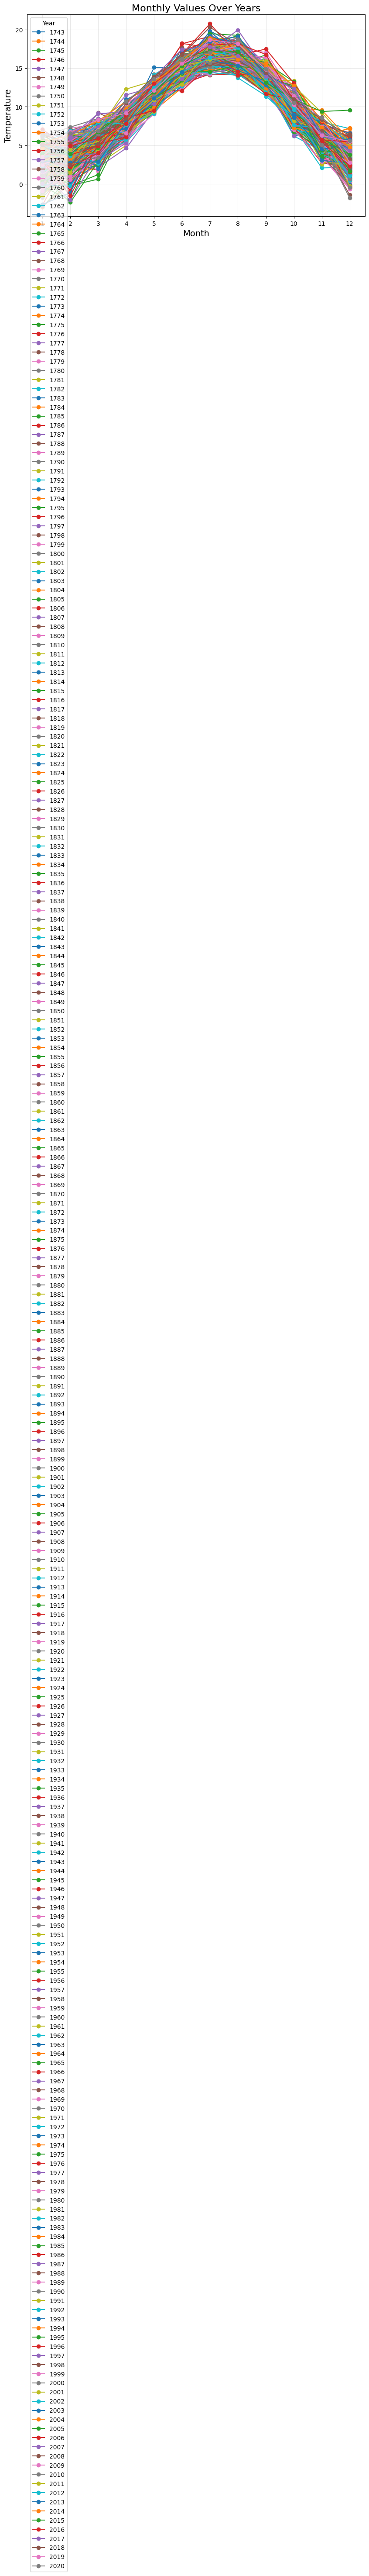

In [173]:
# Pivot table to structure data for plotting
pivot_df = df_merged[df_merged['City']=='7_London'].pivot(index='month', columns='year', values='Actual Temperature')

# Plotting
plt.figure(figsize=(10, 6))

for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year))

# Customizing the plot
plt.title('Monthly Values Over Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.xticks(pivot_df.index)  # Ensure x-axis shows months
plt.legend(title='Year')
plt.grid(alpha=0.3)